In [118]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import dateparser

def read_text_file(f):
    df_complete = pd.read_csv(f)
    return df_complete

reviewsDF = read_text_file("finland_hotel_reviews.csv")

reviewsDF.head()

reviewsDF = reviewsDF.drop('name',1)
reviewsDF = reviewsDF.drop('current_price_per_night',1)
reviewsDF = reviewsDF.drop('average_rating',1)
reviewsDF = reviewsDF.drop('total_reviews_received',1)
reviewsDF = reviewsDF.drop('address',1)
reviewsDF = reviewsDF.drop('lat',1)
reviewsDF = reviewsDF.drop('lng',1)
reviewsDF = reviewsDF.drop('reviewer_nationality',1)
reviewsDF = reviewsDF.drop('review_title',1)
reviewsDF = reviewsDF.drop('review',1)
reviewsDF = reviewsDF.drop('tags',1)

dateparse = lambda dates: dateparser.parse(dates)
reviewsDF['rating_date'] = reviewsDF['rating_date'].apply(lambda row: dateparser.parse(str(row)))
reviewsDF.to_csv('temp.csv')

df = pd.read_csv('temp.csv',parse_dates=['rating_date'], index_col='rating_date',date_parser=dateparse)
df = df.drop('Unnamed: 0',1)
print('Feature set is ready with only date and ratings..')
df.sort_index(axis=1,ascending=True)
df.head()
print('Done')

Feature set is ready with only date and ratings..
Done


In [119]:
ts = df['rating']
ts = ts.sort_index(axis=0)
ts.head()
#ts[:'2011-11-30']

rating_date
2006-08-27    2.0
2006-08-29    3.0
2006-09-23    4.0
2006-10-03    4.0
2006-10-10    4.0
Name: rating, dtype: float64

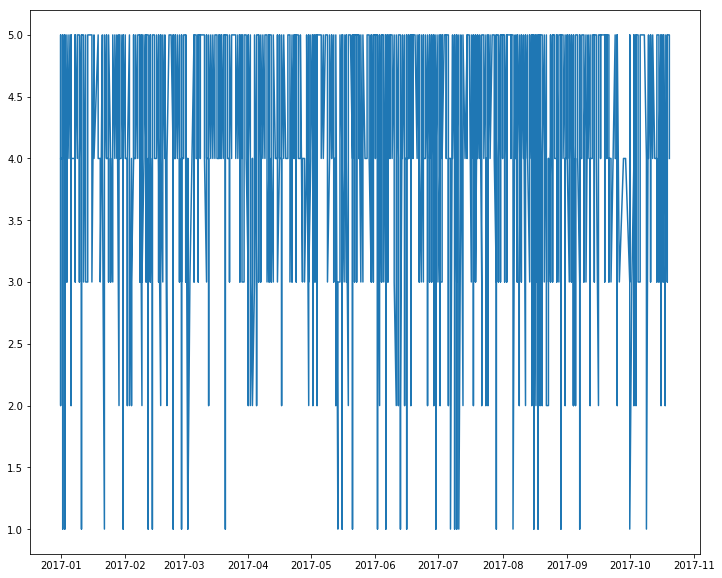

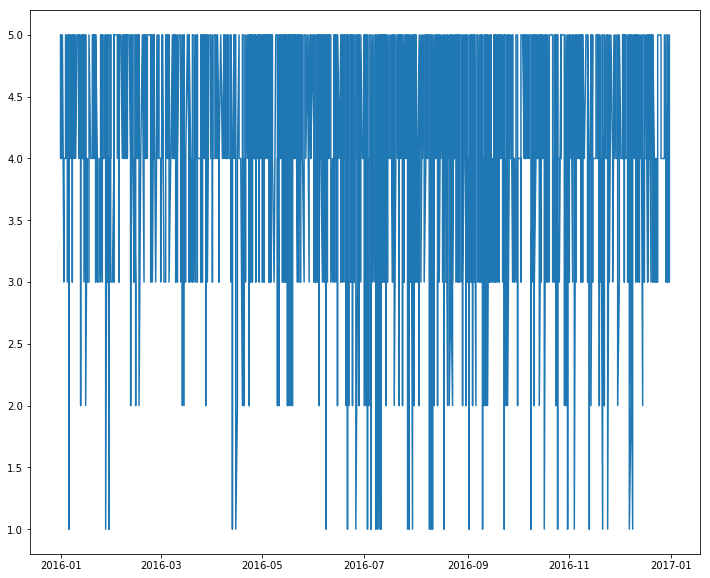

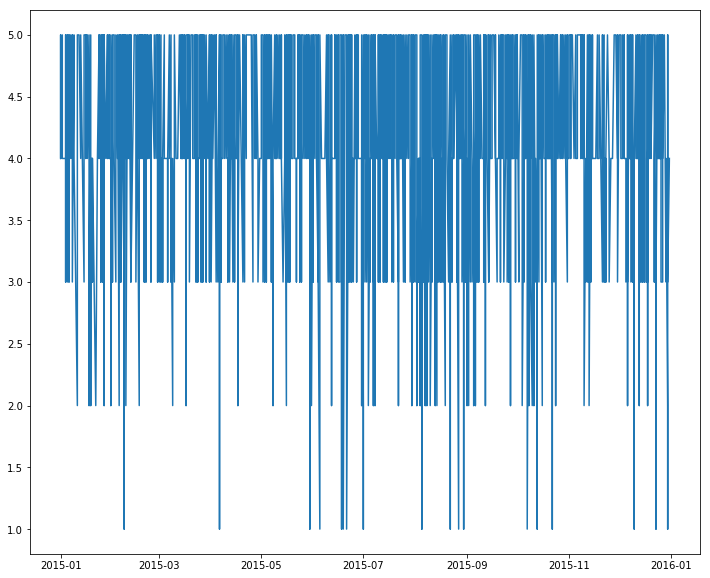

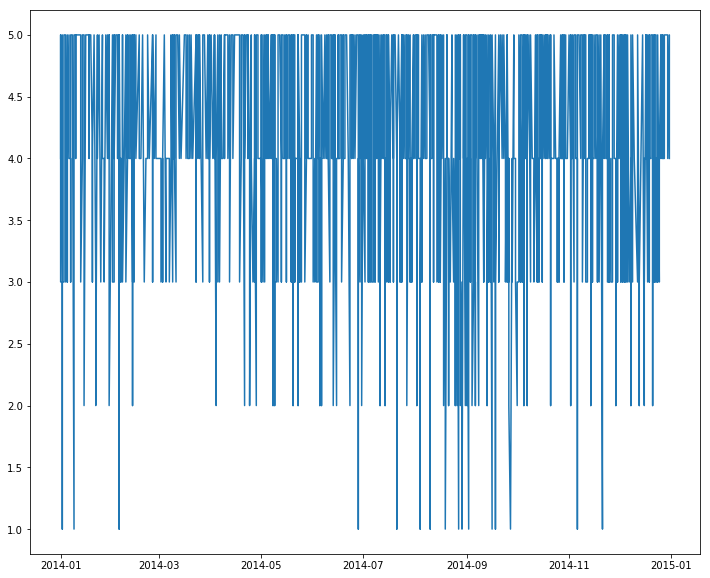

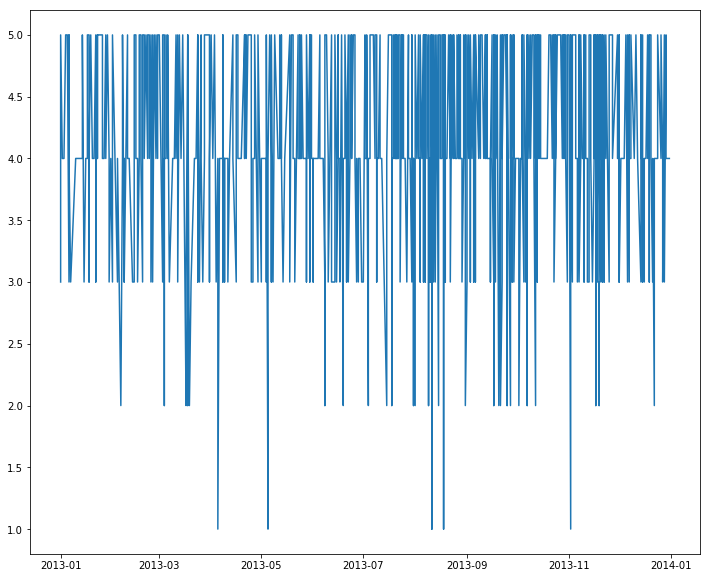

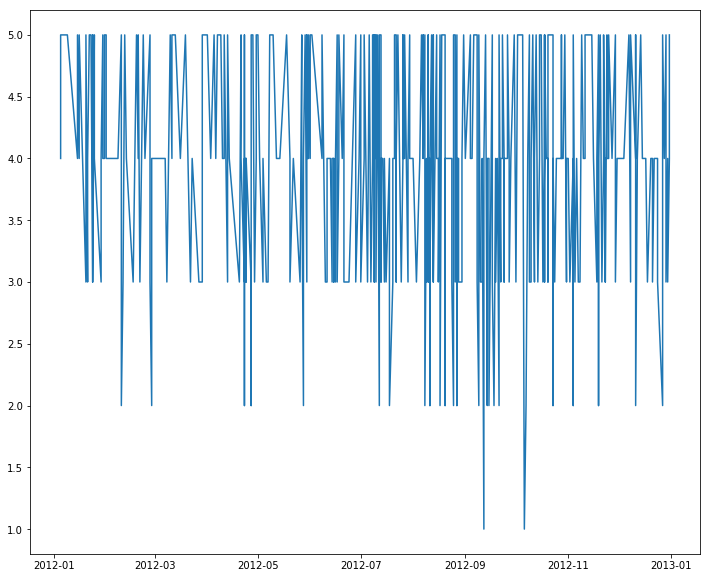

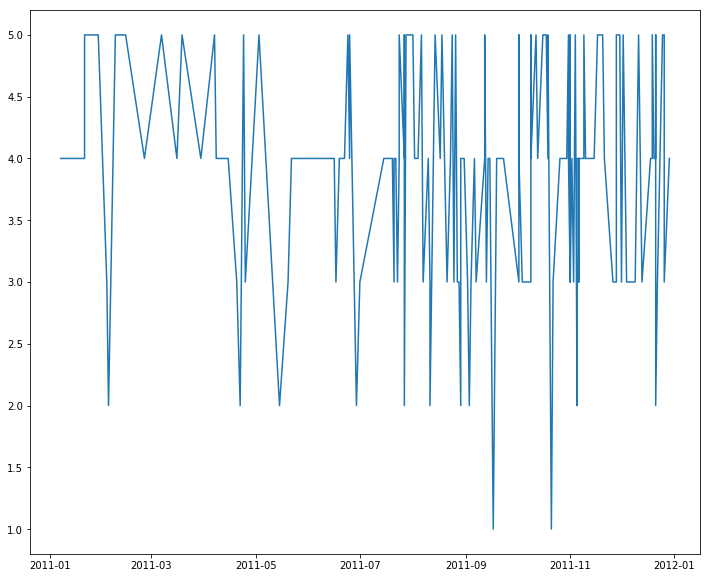

In [120]:
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
plt.figure(figsize=(12,10))
figure = plt.plot(ts['2017-01-01':'2017-12-31'])
plt.figure(figsize=(12,10))
figure = plt.plot(ts['2016-01-01':'2016-12-31'])
plt.figure(figsize=(12,10))
figure = plt.plot(ts['2015-01-01':'2015-12-31'])
plt.figure(figsize=(12,10))
figure = plt.plot(ts['2014-01-01':'2014-12-31'])
plt.figure(figsize=(12,10))
figure = plt.plot(ts['2013-01-01':'2013-12-31'])
plt.figure(figsize=(12,10))
figure = plt.plot(ts['2012-01-01':'2012-12-31'])
plt.figure(figsize=(12,10))
figure = plt.plot(ts['2011-01-01':'2011-12-31'])